In [1]:
from modules.data import load_dataset , view_random_images , augment_dataset , get_split_stats , create_stratified_split
from modules.preprocessing import preprocess_image
from modules.feature_extraction import extract_features , extract_features_skimage
from modules.models import nn_model , svm_model , save_model , load_model
from modules.test_model import test_func

import numpy as np

%reload_ext autoreload
%autoreload 2
%matplotlib inline

# stored variables are:
# %store -r images
# %store -r labels
# %store -r efc_features
# %store -r augmented_images
# %store -r augmented_labels
# %store -r augmented_efc_features
# %store train_images
# %store train_efc_features
# %store train_labels
# %store test_images
# %store test_efc_features
# %store test_labels
# %store val_images
# %store val_efc_features
# %store val_labels

%store -r

DataSet Size : 1821


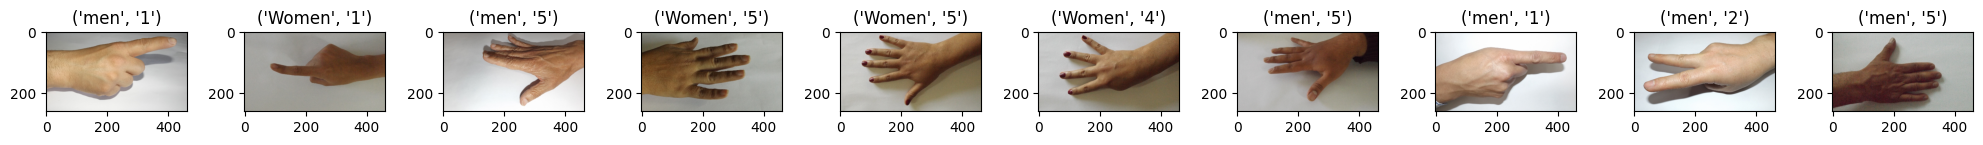

In [2]:
#Load the dataset and view some random images

# images , labels = load_dataset('dataset')
# %store images
# %store labels

print("DataSet Size :" , len(images))
assert len(images) == len(labels) , "Images and labels are not of the same size"
view_random_images(images, labels , num_images=10)

Augmented DataSet Size : 679


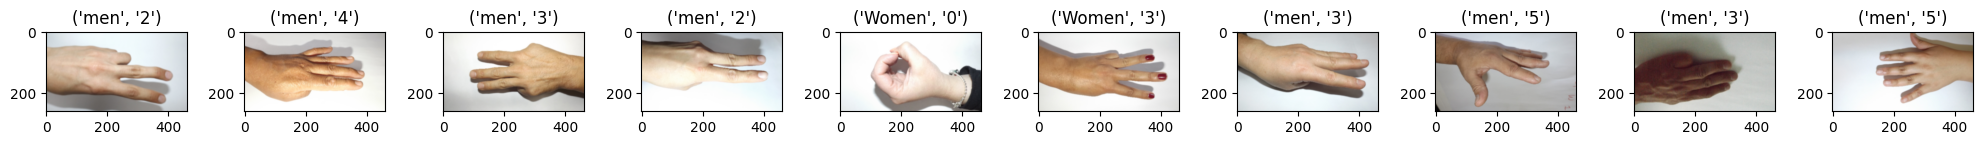

In [3]:
#Augment the dataset and view some random images

# augmented_images , augmented_labels = augment_dataset(images, labels , num_images=679)
# %store augmented_images
# %store augmented_labels

print("Augmented DataSet Size :" , len(augmented_images))
assert len(augmented_images) == len(augmented_labels) , "Images and labels of augmented Dataset are not of the same size"
view_random_images(augmented_images, augmented_labels , num_images=10)

1335
Shape of the image : (260, 461)
Label:  ('Women', '2')


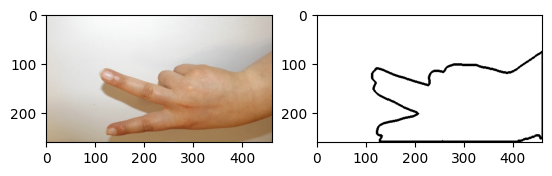

In [4]:
import matplotlib.pyplot as plt
num = np.random.randint(0,len(images))
print(num)
img , efc_feature = preprocess_image(images[num])
#Shape of the image
print("Shape of the image :" , img.shape)
print("Label: " , labels[num])
#PLOT 2 IMAGES
plt.subplot(1,2,1)
plt.imshow(images[num])
plt.subplot(1,2,2)
plt.imshow(img , cmap='binary')
plt.show()

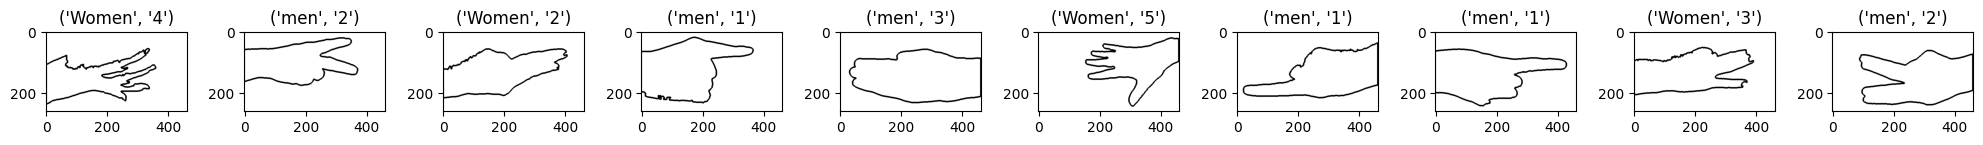

In [7]:
# preprocess the images and store them in place
efc_features = []
for i in range(len(images)):
    img , efc_feature = preprocess_image(images[i])
    efc_features.append(efc_feature)
    images[i] = img

# %store efc_features

# view some random images
view_random_images(images, labels , num_images=10)

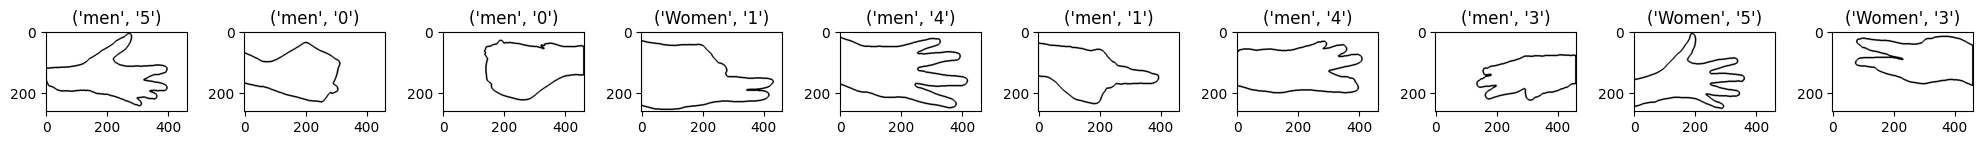

In [8]:
# preprocess the augmented images and store them in place
efc_features_augmented = []
for i in range(len(augmented_images)):
    img , efc_feature = preprocess_image(augmented_images[i])
    efc_features_augmented.append(efc_feature)
    augmented_images[i] = img

# %store efc_features_augmented

# view some random images
view_random_images(augmented_images, augmented_labels , num_images=10)

In [9]:
# train_images, train_efc_features, train_labels, \
# test_images, test_efc_features, test_labels, \
# val_images, val_efc_features, val_labels \
#             =create_stratified_split(images= images , 
#                                      labels= labels , 
#                                      efc_features = efc_features , 
#                                      test_size=0.1, 
#                                      val_size=0.1)
# %store train_images
# %store train_efc_features
# %store train_labels
# %store test_images
# %store test_efc_features
# %store test_labels
# %store val_images
# %store val_efc_features
# %store val_labels

print("Train Set Size :" , len(train_images))
print("Test Set Size :" , len(test_images))
print("Val Set Size :" , len(val_images))

Train Set Size : 1459
Test Set Size : 181
Val Set Size : 181


In [10]:
get_split_stats(train_labels, test_labels, val_labels)

+Train Set----+-----+-------+-------+------------+
| class_count | Men | Women | Total | percentage |
+-------------+-----+-------+-------+------------+
| 0           | 146 | 93    | 239   | 0.16       |
| 1           | 143 | 105   | 248   | 0.17       |
| 2           | 141 | 103   | 244   | 0.17       |
| 3           | 141 | 109   | 250   | 0.17       |
| 4           | 137 | 108   | 245   | 0.17       |
| 5           | 128 | 105   | 233   | 0.16       |
+-------------+-----+-------+-------+------------+
+Test Set-----+-----+-------+-------+------------+
| class_count | Men | Women | Total | percentage |
+-------------+-----+-------+-------+------------+
| 0           | 13  | 12    | 25    | 0.14       |
| 1           | 13  | 11    | 24    | 0.13       |
| 2           | 18  | 17    | 35    | 0.19       |
| 3           | 22  | 13    | 35    | 0.19       |
| 4           | 18  | 10    | 28    | 0.15       |
| 5           | 21  | 13    | 34    | 0.19       |
+-------------+-----+-------+--

In [11]:
#all augmented images are used for training
train_images.extend(augmented_images)
train_labels.extend(augmented_labels)
train_efc_features.extend(efc_features_augmented)

In [12]:
print("Train Set Size :" , len(train_images))
assert len(train_images) == len(train_labels) == len(train_efc_features) , "Images and labels of train Dataset are not of the same size"

Train Set Size : 2138


### Extract HOG Features

Label:  ('men', '0')


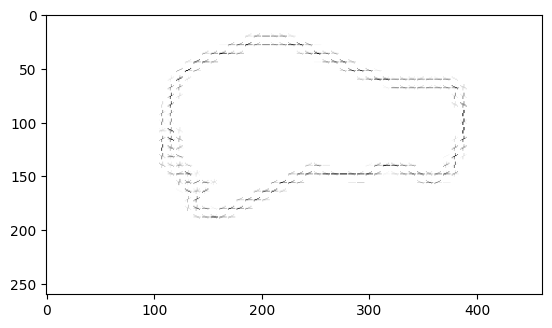

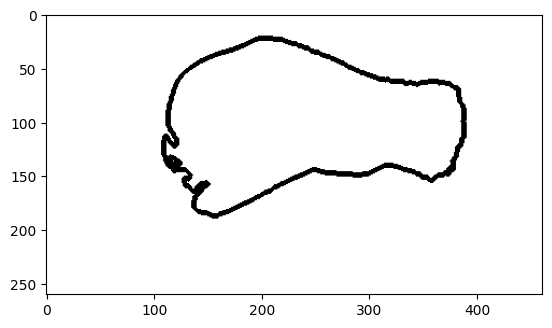

In [13]:
from modules.feature_extraction import visualize_HOG
## here we explore the HOG features of a random image
## and how the HOG features change with different parameters
## the default parameters are the ones we chose 
index = np.random.randint(0,len(train_images))
image = train_images[index]
print("Label: " , train_labels[index])
visualize_HOG(image)

In [14]:
# # Extract all features from the whole dataset
# train_HOG_features = np.array([])
# test_HOG_features = np.array([])
# val_HOG_features = np.array([])

# for image in train_images:
#     features = extract_features_skimage(image)
#     if train_HOG_features.size == 0:
#         train_HOG_features = features
#     else:
#         train_HOG_features = np.vstack((train_HOG_features, features))

# for image in test_images:
#     features = extract_features_skimage(image)
#     if test_HOG_features.size == 0:
#         test_HOG_features = features
#     else:
#         test_HOG_features = np.vstack((test_HOG_features, features))

# for image in val_images:
#     features = extract_features_skimage(image)
#     if val_HOG_features.size == 0:
#         val_HOG_features = features
#     else:
#         val_HOG_features = np.vstack((val_HOG_features, features))

In [15]:
# import pickle
# # Save the train_features in a pickle file
# with open('features\\train_features.pkl', 'wb') as f:
#     pickle.dump(train_HOG_features, f)

# # Save the test_features in a pickle file
# with open('features\\test_features.pkl', 'wb') as f:
#     pickle.dump(test_HOG_features, f)

# # Save the val_features in a pickle file
# with open('features\\val_features.pkl', 'wb') as f:
#     pickle.dump(val_HOG_features, f)

In [16]:
import pickle 
# load the train_features from the pickle file
with open('features\\train_features.pkl', 'rb') as f:
    train_HOG_features = pickle.load(f)

# load the test_features from the pickle file
with open('features\\test_features.pkl', 'rb') as f:
    test_HOG_features = pickle.load(f)

# load the val_features from the pickle file
with open('features\\val_features.pkl', 'rb') as f:
    val_HOG_features = pickle.load(f)

In [17]:
print("Train_HOG_Features_Shape",train_HOG_features.shape)
print("Test_HOG_Features_Shape",test_HOG_features.shape)
print("Val_HOG_Features_Shape",val_HOG_features.shape)

Train_HOG_Features_Shape (2138, 133650)
Test_HOG_Features_Shape (181, 133650)
Val_HOG_Features_Shape (181, 133650)


### Append Ellptical_fourier_features to the HOG features

### Try different values of n_components 
- The extracted features should be experimented to choose the best value for n_components. 

In [18]:
from modules.feature_extraction import reduce_features

# Reduce the dimensionality of the features
pca3, train_features_reduced3 = reduce_features(train_HOG_features, n_components= 0.49)

In [19]:
# Reduce the dimensionality of the features
pca4, train_features_reduced4 = reduce_features(train_HOG_features, n_components= 0.50)

In [20]:
# Reduce the dimensionality of the features
pca5, train_features_reduced5 = reduce_features(train_HOG_features, n_components= 0.51)

In [21]:
# print all the reduced features shapes
print(train_features_reduced3.shape)
print(train_features_reduced4.shape)
print(train_features_reduced5.shape)

(2138, 110)
(2138, 116)
(2138, 122)


In [22]:
print("Test_features_shape: ",str(test_HOG_features.shape))

Test_features_shape:  (181, 133650)


In [23]:
test_features_reduced3 = pca3.transform(test_HOG_features)
test_features_reduced4 = pca4.transform(test_HOG_features)
test_features_reduced5 = pca5.transform(test_HOG_features)

In [24]:
print("Test_features_reduced_shape: ",str(test_features_reduced3.shape))
print("Test_features_reduced_shape: ",str(test_features_reduced4.shape))
print("Test_features_reduced_shape: ",str(test_features_reduced5.shape))

Test_features_reduced_shape:  (181, 110)
Test_features_reduced_shape:  (181, 116)
Test_features_reduced_shape:  (181, 122)


In [25]:
#Extracting Digit labels
train_labels_digit = [x[1] for x in train_labels]
test_labels_digit = [x[1] for x in test_labels]

#Converting Labels to NP array
train_labels_digit = np.array(train_labels_digit).astype(int)
test_labels_digit = np.array(test_labels_digit).astype(int)

#printing Label vector shape
print("Train_labels_shape: ",str(train_labels_digit.shape))
print("Test_labels_shape: ",str(test_labels_digit.shape))

Train_labels_shape:  (2138,)
Test_labels_shape:  (181,)


In [26]:
SVM_model4 = svm_model(train_features_reduced4, train_labels_digit, test_features_reduced4, test_labels_digit)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Accuracy: 
0.6906077348066298
Confusion Matrix: 
[[24  0  0  0  0  1]
 [ 0 21  2  0  0  1]
 [ 0  6 19  8  2  0]
 [ 2  3  6 20  4  0]
 [ 0  1  2  8 14  3]
 [ 0  3  0  3  1 27]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.62      0.88      0.72        24
           2       0.66      0.54      0.59        35
           3       0.51      0.57      0.54        35
           4       0.67      0.50      0.57        28
           5       0.84      0.79      0.82        34

    accuracy                           0.69       181
   macro avg       0.70      0.71      0.70       181
weighted avg       0.70      0.69      0.69       181



In [27]:
SVM_model5 = svm_model(train_features_reduced5, train_labels_digit, test_features_reduced5, test_labels_digit)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Accuracy: 
0.6464088397790055
Confusion Matrix: 
[[22  0  0  1  1  1]
 [ 0 16  4  3  0  1]
 [ 0  5 18 10  2  0]
 [ 2  1  4 23  5  0]
 [ 0  2  2  7 14  3]
 [ 1  1  0  3  5 24]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        25
           1       0.64      0.67      0.65        24
           2       0.64      0.51      0.57        35
           3       0.49      0.66      0.56        35
           4       0.52      0.50      0.51        28
           5       0.83      0.71      0.76        34

    accuracy                           0.65       181
   macro avg       0.67      0.65      0.66       181
weighted avg       0.66      0.65      0.65       181



In [28]:
SVM_model3 = svm_model(train_features_reduced3, train_labels_digit, test_features_reduced3, test_labels_digit)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Accuracy: 
0.6906077348066298
Confusion Matrix: 
[[24  0  0  0  0  1]
 [ 0 21  2  0  0  1]
 [ 0  6 19  8  2  0]
 [ 2  3  4 19  6  1]
 [ 1  3  2  6 14  2]
 [ 0  1  1  3  1 28]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        25
           1       0.62      0.88      0.72        24
           2       0.68      0.54      0.60        35
           3       0.53      0.54      0.54        35
           4       0.61      0.50      0.55        28
           5       0.85      0.82      0.84        34

    accuracy                           0.69       181
   macro avg       0.70      0.71      0.70       181
weighted avg       0.69      0.69      0.69       181



In [31]:
nn_model4 = nn_model(train_features_reduced4, train_labels_digit, test_features_reduced4, test_labels_digit,epochs = 10 , num = 4)

Epoch 1/10
134/134 [==============================] - 3s 11ms/step - loss: 1.5831 - accuracy: 0.3630 - val_loss: 1.2285 - val_accuracy: 0.5249
Epoch 2/10
134/134 [==============================] - 1s 8ms/step - loss: 0.9921 - accuracy: 0.6370 - val_loss: 1.0040 - val_accuracy: 0.6077
Epoch 3/10
134/134 [==============================] - 1s 8ms/step - loss: 0.7629 - accuracy: 0.7119 - val_loss: 0.9605 - val_accuracy: 0.6409
Epoch 4/10
134/134 [==============================] - 1s 10ms/step - loss: 0.6292 - accuracy: 0.7811 - val_loss: 0.9789 - val_accuracy: 0.6188
Epoch 5/10
134/134 [==============================] - 1s 8ms/step - loss: 0.5241 - accuracy: 0.8255 - val_loss: 0.9596 - val_accuracy: 0.6298
Epoch 6/10
134/134 [==============================] - 1s 7ms/step - loss: 0.4417 - accuracy: 0.8616 - val_loss: 0.9478 - val_accuracy: 0.6575
Epoch 7/10
134/134 [==============================] - 1s 9ms/step - loss: 0.3533 - accuracy: 0.8999 - val_loss: 0.9961 - val_accuracy: 0.6022
Epoc

In [32]:
nn_model5 = nn_model(train_features_reduced5, train_labels_digit, test_features_reduced5, test_labels_digit,epochs = 10 , num = 5)

Epoch 1/10
134/134 [==============================] - 2s 9ms/step - loss: 1.5570 - accuracy: 0.3742 - val_loss: 1.2446 - val_accuracy: 0.4972
Epoch 2/10
134/134 [==============================] - 1s 6ms/step - loss: 0.9498 - accuracy: 0.6548 - val_loss: 1.0187 - val_accuracy: 0.5746
Epoch 3/10
134/134 [==============================] - 1s 7ms/step - loss: 0.7361 - accuracy: 0.7311 - val_loss: 0.9439 - val_accuracy: 0.5967
Epoch 4/10
134/134 [==============================] - 1s 8ms/step - loss: 0.6125 - accuracy: 0.7844 - val_loss: 0.9542 - val_accuracy: 0.5635
Epoch 5/10
134/134 [==============================] - 1s 9ms/step - loss: 0.5063 - accuracy: 0.8237 - val_loss: 0.9558 - val_accuracy: 0.6022
Epoch 6/10
134/134 [==============================] - 1s 10ms/step - loss: 0.4162 - accuracy: 0.8742 - val_loss: 1.0031 - val_accuracy: 0.5746
Epoch 6: early stopping


In [35]:
nn_model3 = nn_model(train_features_reduced3, train_labels_digit, test_features_reduced3, test_labels_digit,epochs = 30 , num = 3)

Epoch 1/30
134/134 [==============================] - 1s 6ms/step - loss: 1.5464 - accuracy: 0.3718 - val_loss: 1.2640 - val_accuracy: 0.5083
Epoch 2/30
134/134 [==============================] - 1s 4ms/step - loss: 0.9704 - accuracy: 0.6291 - val_loss: 1.0562 - val_accuracy: 0.5856
Epoch 3/30
134/134 [==============================] - 1s 5ms/step - loss: 0.7667 - accuracy: 0.7254 - val_loss: 1.0469 - val_accuracy: 0.5856
Epoch 4/30
134/134 [==============================] - 1s 4ms/step - loss: 0.6433 - accuracy: 0.7760 - val_loss: 0.9884 - val_accuracy: 0.6133
Epoch 5/30
134/134 [==============================] - 1s 4ms/step - loss: 0.5447 - accuracy: 0.8148 - val_loss: 1.0052 - val_accuracy: 0.6188
Epoch 6/30
134/134 [==============================] - 1s 5ms/step - loss: 0.4573 - accuracy: 0.8471 - val_loss: 1.0029 - val_accuracy: 0.6243
Epoch 7/30
134/134 [==============================] - 1s 5ms/step - loss: 0.3731 - accuracy: 0.8920 - val_loss: 1.0261 - val_accuracy: 0.6464
Epoch 

In [ ]:
# #save the model
# save_model(model4, "svm_model4_best_acc_0.69")
# save_model(pca4, "pca4_n_components_0.5")

In [ ]:
#use the svm model 4 to predict the val set
val_features_reduced4 = pca4.transform(val_HOG_features)

val_labels_digit = [x[1] for x in val_labels]
val_labels_digit = np.array(val_labels_digit).astype(int)
val_predictions = model4.predict(val_features_reduced4)


#calculate the accuracy of the model
from sklearn.metrics import accuracy_score , confusion_matrix
accuracy = accuracy_score(val_labels_digit, val_predictions)
print("Accuracy: ",accuracy)
print("Confusion Matrix: \n",confusion_matrix(val_labels_digit, val_predictions))





In [ ]:
val_predictions = nn_model4.predict(val_features_reduced4)
val_predictions = np.argmax(val_predictions, axis=1)
accuracy = accuracy_score(val_labels_digit, val_predictions)
print("Accuracy: ",accuracy)
print("Confusion Matrix: \n",confusion_matrix(val_labels_digit, val_predictions))

### Test Model

In [ ]:
N = 4
model = load_model("svm_model4_best_acc_0.69")
pca = load_model("pca4_n_components_0.5")

test_func('data', N, model, pca)